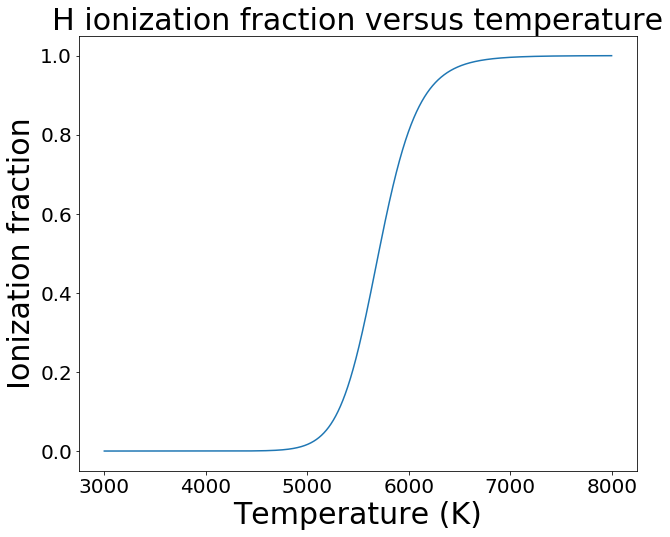

In [14]:
import numpy as np
from astropy.io import fits 
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u

font1=30
font2=20
ne=1*1e15 ## typical coronae region tipical density
chi={'H':[13.598*u.eV],'C':[1086.5,2352.6,4620.5,6222.7,37831,47277]*u.kJ/c.N_A/u.mole}
U_C=[9,6,1,2,1,2,1]
# get the ratio: N_(l+1)/N_l
def getK(T,element_str='H',level=0,u0=2,u1=1):    
    return np.array(2*u1/u0/ne*(2 * np.pi * c.m_e * c.k_B * T / c.h**2)**1.5* np.exp(-chi[element_str][level] / (c.k_B * T)))

T = np.arange(3000,8000,1)*u.K
K_T=getK(T,'H',0)

X=K_T/(1+K_T)

plt.figure(figsize=(10,8))
plt.plot(T,X)
plt.title('H ionization fraction versus temperature',fontsize=font1)
plt.xlabel('Temperature (K)',fontsize=font1)
plt.ylabel('Ionization fraction',fontsize=font1)
plt.tick_params(labelsize=font2)
plt.savefig('H_ionization.png',format='png')
plt.show()

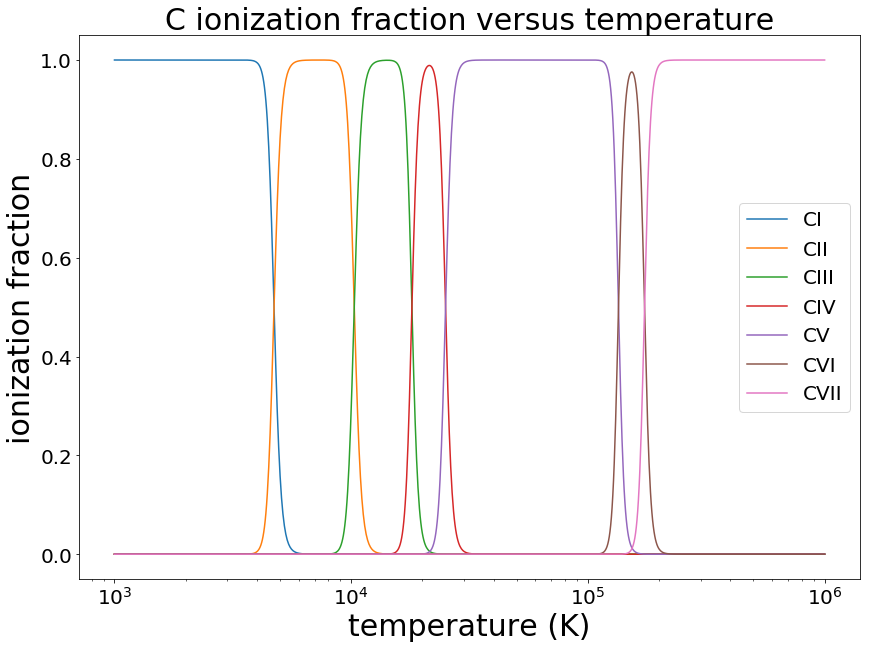

In [16]:
T = np.logspace(3,6,1000)*u.K
label_C=['CI','CII','CIII','CIV','CV','CVI','CVII']
K_T=[1]
K_all=1
for each in range(6):
    result=getK(T,'C',each,u0=U_C[each],u1=U_C[each+1])*K_T[each]
    K_T.append(result)
    K_all=K_all+result
X_T=[1/K_all]
for each in range(6):
    X_T.append(K_T[each+1]/K_all)


plt.figure(figsize=(14,10))
for each in range(0,7):
    plt.semilogx(T,X_T[each],label=label_C[each])
plt.title('C ionization fraction versus temperature',fontsize=font1)
plt.xlabel('temperature (K)',fontsize=font1)
plt.ylabel('ionization fraction',fontsize=font1)
plt.tick_params(labelsize=font2)
plt.legend(fontsize=font2)
plt.savefig('C_ionization.png',format='png')
plt.show()

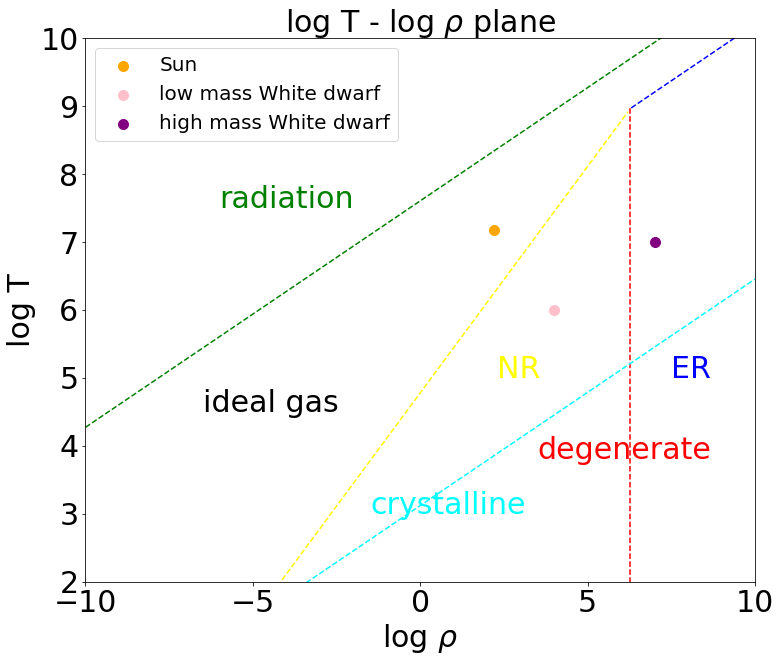

In [66]:
KNR=1.0036e13
KER=1.2435e15
logdensity_er_nr=3*np.log10(KER/KNR)
logT_er_nr=2/3*logdensity_er_nr-np.log10(2*c.R.cgs.value/KNR)
a=7.56e-15
crystall=np.log10(2.25e5/170)
logT_sun=np.log10(1.5e7)
logdensity_sun=np.log10(160)
logdensity_low_wd=4
logT_low_wd=6
logdensity_high_wd=7
logT_high_wd=7

plt.figure(figsize=(12,10))
logdensity = np.linspace(-10, 10, num = 201)
logT_gas_nr=2/3*logdensity[logdensity<logdensity_er_nr]-np.log10(2*c.R.cgs.value/KNR)
logT_gas_er=1/3*logdensity[logdensity>logdensity_er_nr]-np.log10(2*c.R.cgs.value/KER)
logT_gas_rad=1/3*logdensity+1/3*np.log10(6*c.R.cgs.value/a)
logT_crystall=1/3*logdensity+crystall
plt.plot(logdensity[logdensity<logdensity_er_nr],logT_gas_nr,'--',color='yellow')
plt.plot(logdensity[logdensity>logdensity_er_nr],logT_gas_er,'--',color='blue')
plt.plot(logdensity,logT_gas_rad,'--',color='green')
plt.plot(logdensity,logT_crystall,'--',color='cyan')
plt.vlines(logdensity_er_nr,ymin=0,ymax=logT_er_nr,color='red',linestyle='dashed')
plt.xlabel(r'log $\rho$',fontsize=font1)
plt.ylabel(r'log T',fontsize=font1)
plt.title(r'log T - log $\rho$ plane',fontsize=font1)
plt.tick_params(labelsize=font1)
plt.axis([-10,10,2,10])
plt.text(-6,7.5,'radiation',fontsize=font1,color='green')
plt.text(-6.5,4.5,'ideal gas',fontsize=font1)
plt.text(2.3,5,'NR',fontsize=font1,color='yellow')
plt.text(7.5,5,'ER',fontsize=font1,color='blue')
plt.text(3.5,3.8,'degenerate',fontsize=font1,color='red')
plt.text(-1.5,3,'crystalline',fontsize=font1,color='cyan')
plt.scatter(logdensity_sun,logT_sun,label='Sun',color='orange',s=100)
plt.scatter(logdensity_low_wd,logT_low_wd,label='low mass White dwarf',color='pink',s=100)
plt.scatter(logdensity_high_wd,logT_high_wd,label='high mass White dwarf',color='purple',s=100)
plt.legend(fontsize=font2)
plt.savefig('logT-logrho.png',format='png')
plt.show()

In [270]:
print(c.k_B.cgs.value)
c.e.esu**2/c.k_B.cgs*(4*np.pi/3/c.m_p.cgs)**(1/3)

1.3806488e-16


<Quantity 226921.62781402795 Fr2 K / (erg g(1/3))>

In [289]:
26.734*u.MeV.to(u.erg)

4.283258828871e-05

In [295]:
2*8.977e37/4/np.pi/c.au**2

<Quantity 638411251827209.0 1 / m2>

<Quantity 6.694840942485531e-27 kg>

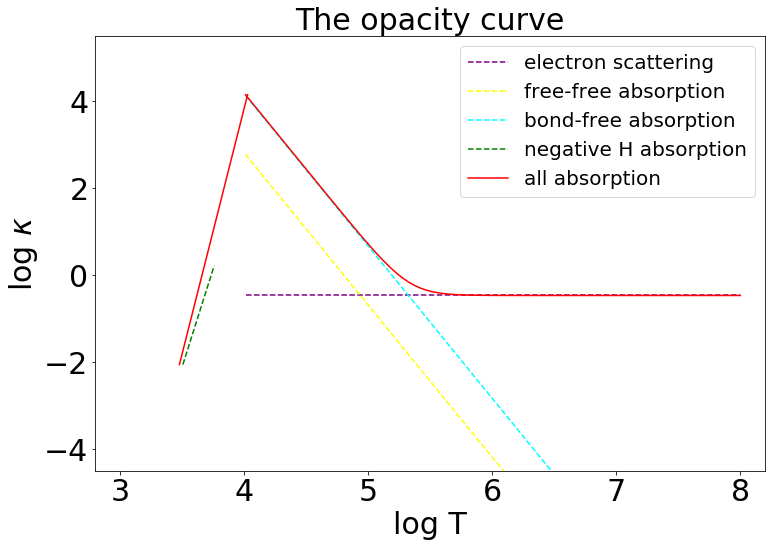

In [194]:
X=0.7
Z=0.02
density=1e-6


T = np.logspace(3,8,100)


def getkapa_ff(T):
    kapa=3.8*1e22*(1+X)*density*T**-3.5
    return kapa
def getkapa_bf(T):
    kapa=4.3*1e25*(1+X)*Z*density*T**-3.5
    return kapa
def getkapa_nH(T):
    kapa=2.5*1e-31*(Z/0.02)*density**0.5*T**9
    return kapa



kapa_es=0.2*(1+X)*np.ones(len(T))
kapa_ff=getkapa_ff(T)
kapa_bf=getkapa_bf(T)
kapa_nH=getkapa_nH(T)
kapa_all=kapa_es+kapa_ff+kapa_bf  

logT_insert=np.arange(np.log10(3000),4+0.05,0.05)

logkapa_insert=np.arange(np.log10(kapa_nH[10]),np.log10(kapa_all[20]+1),(np.log10(kapa_all[20])-np.log10(kapa_nH[10]))/11)


plt.figure(figsize = (12,8))
plt.tick_params(labelsize=font1)
plt.title('The opacity curve',fontsize=font1)
plt.xlabel('log T',fontsize=font1)
plt.ylabel(r'log $\kappa$',fontsize=font1)
plt.plot(np.log10(T[T>1e4]),np.log10(kapa_es[T>1e4]),'--',label='electron scattering',color='purple')
plt.plot(np.log10(T[T>1e4]),np.log10(kapa_ff[T>1e4]),'--',label='free-free absorption',color='yellow')
plt.plot(np.log10(T[T>1e4]),np.log10(kapa_bf[T>1e4]),'--',label='bond-free absorption',color='cyan')
plt.plot(np.log10(T[((T>3000) & (T<6000))]),np.log10(kapa_nH[((T>3000) & (T<6000))]),'--',label='negative H absorption',color='green')
plt.plot(np.log10(T[T>1e4]),np.log10(kapa_all[T>1e4]),label='all absorption',color='red')
plt.plot(logT_insert,logkapa_insert,color='red')
plt.axis([2.8,8.2,-4.5,5.5])
plt.legend(fontsize=font2)
plt.savefig('opacity.png',format='png')
plt.show()

In [3]:
import numpy as np
from astropy.io import fits 
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u

#import fits data
stars_fits=fits.open('/Users/panzhiwei/Desktop/astronomy/恒星物理/HW2/gaia_all100pc-result.fits')
data=stars_fits[1].data



Gmag_raw=data['phot_g_mean_mag']
flux_div_err=data['phot_g_mean_flux_over_error']
b_div_err=data['phot_bp_mean_flux_over_error']
r_div_err=data['phot_rp_mean_flux_over_error']
plx=data['parallax']
plx_err=data['parallax_error']
astroerror=data['astrometric_excess_noise']
bprp_raw=data['bp_rp']




Gmag_abs=[]
bp_rp_gaia=[]
print(len(plx))
for each in range(len(Gmag_raw)):
    if astroerror[each]<1 and flux_div_err[each]>10 and b_div_err[each]>10 and \
       r_div_err[each]>10 and plx_err[each]/plx[each]<0.1:
        gabs=Gmag_raw[each]-10+5*np.log10(plx[each])
        if 0<gabs<15.05 and gabs<3*bprp_raw[each]+6 and ((gabs>4) or (bprp_raw[each]<1)):
            Gmag_abs.append(gabs)
            bp_rp_gaia.append(bprp_raw[each])

print(len(Gmag_abs))
mag=np.arange(0,15.05,0.1)
number=np.zeros(len(mag))
for each in Gmag_abs:
    number[int(round(each/0.1))]=number[int(round(each/0.1))]+1

700055
232987


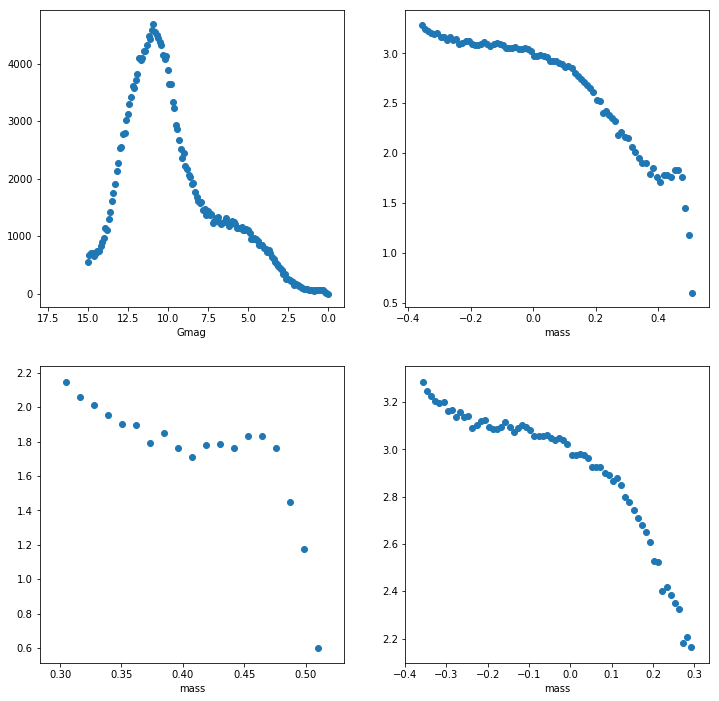

In [249]:
mag183=mag[mag<1.83]
mass183=(0.4*(4.83-mag183)-np.log10(1.4))/3.5
number183=number[mag<1.83]

index850=(mag>1.83) & (mag<8.50)
mag850=mag[index850]
mass850=0.1*(4.83-mag850)
number850=number[index850]

mass2=np.concatenate((mass850,mass183))
number2=np.concatenate((number850,number183))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.scatter(mag,number)
plt.xlabel('Gmag')
plt.xlim(18,-1)

plt.subplot(222)
plt.scatter(mass2,np.log10(number2))
plt.xlabel('mass')

plt.subplot(223)
plt.scatter(mass183,np.log10(number183))
plt.xlabel('mass')

plt.subplot(224)
plt.scatter(mass850,np.log10(number850))
plt.xlabel('mass')
plt.show()



[ 0.1         0.16926666  0.28651203  0.48496934  0.82089142  1.38949549
  2.35195264  3.98107171]


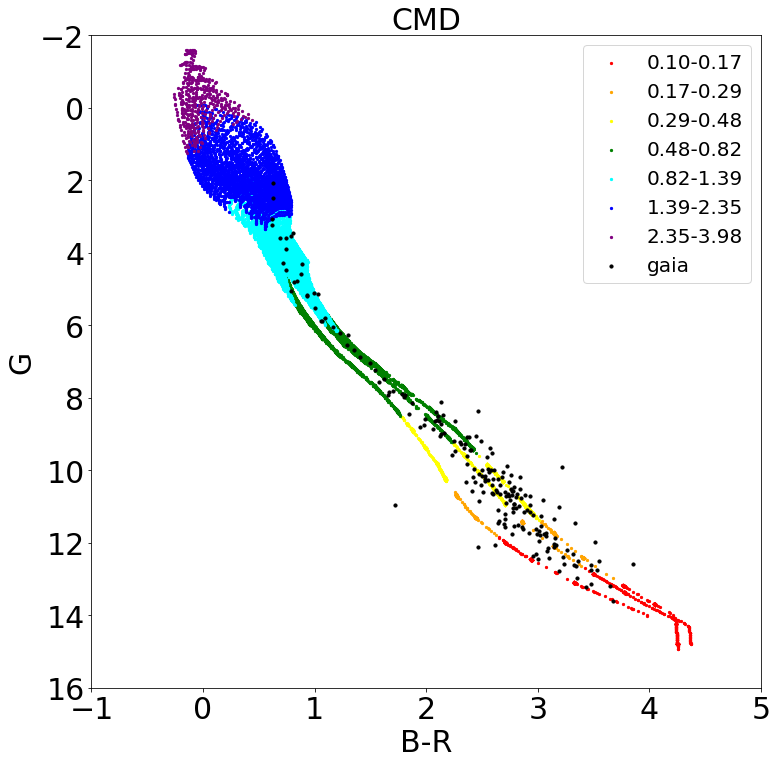

In [70]:

model_fits=fits.open('1e8_13e9.fits')
model=model_fits[1].data
mass_model=model['mass']
Gmag_model=model['Gmag']
Bp_model=model['G_BPmag']
Rp_model=model['G_RPmag']

model2_fits=fits.open('z025.fits')
model2=model2_fits[1].data
mass_model2=model2['mass']
Gmag_model2=model2['Gmag']
Bp_model2=model2['G_BPmag']
Rp_model2=model2['G_RPmag']

model3_fits=fits.open('z005.fits')
model3=model3_fits[1].data
mass_model3=model3['mass']
Gmag_model3=model3['Gmag']
Bp_model3=model3['G_BPmag']
Rp_model3=model3['G_RPmag']
 

mass=T = np.logspace(-1,0.6,8)
color_list=['red','orange','yellow','green','cyan','blue','purple','pink',
           'red','orange','yellow','green','cyan','blue','purple','pink',
           'red','orange','yellow','green','cyan','blue','purple','pink',
           'red','orange','yellow','green','cyan','blue','purple','pink']


def plotmassbin(mass_1ow,mass_high,color1,color2,color3):
    index_mass=(mass_model>mass_1ow)&(mass_model<mass_high)
    G=Gmag_model[index_mass]
    Bp=Bp_model[index_mass]
    Rp=Rp_model[index_mass]
    plt.scatter(Bp-Rp,G,s=5,color=color1)
    index_mass2=(mass_model2>mass_1ow)&(mass_model2<mass_high)
    G2=Gmag_model2[index_mass2]
    Bp2=Bp_model2[index_mass2]
    Rp2=Rp_model2[index_mass2]
    plt.scatter(Bp2-Rp2,G2,s=5,color=color2)
    index_mass3=(mass_model3>mass_1ow)&(mass_model3<mass_high)
    G3=Gmag_model3[index_mass3]
    Bp3=Bp_model3[index_mass3]
    Rp3=Rp_model3[index_mass3]
    plt.scatter(Bp3-Rp3,G3,s=5,color=color3,label='{:.2f}-{:.2f}'.format(mass_1ow,mass_high))


print(mass)    
plt.figure(figsize=(12,12))
for each in range(len(mass)-1):
    plotmassbin(mass[each],mass[each+1],color_list[each],color_list[each],color_list[each])
plt.axis([-1,5,16,-2])
plt.tick_params(labelsize=font1)
plt.title('CMD',fontsize=font1)
plt.xlabel('B-R',fontsize=font1)
plt.ylabel('G',fontsize=font1)
plt.scatter(bp_rp_gaia[1:200],Gmag_abs[1:200],s=10,color='black',label='gaia')
plt.legend(fontsize=font2)
plt.savefig('CMD.png',format='png')
plt.show()




[-0.08250739  0.43317842 -0.01848491  0.00093356 -0.02750791 -0.00392022] 1.29613973393


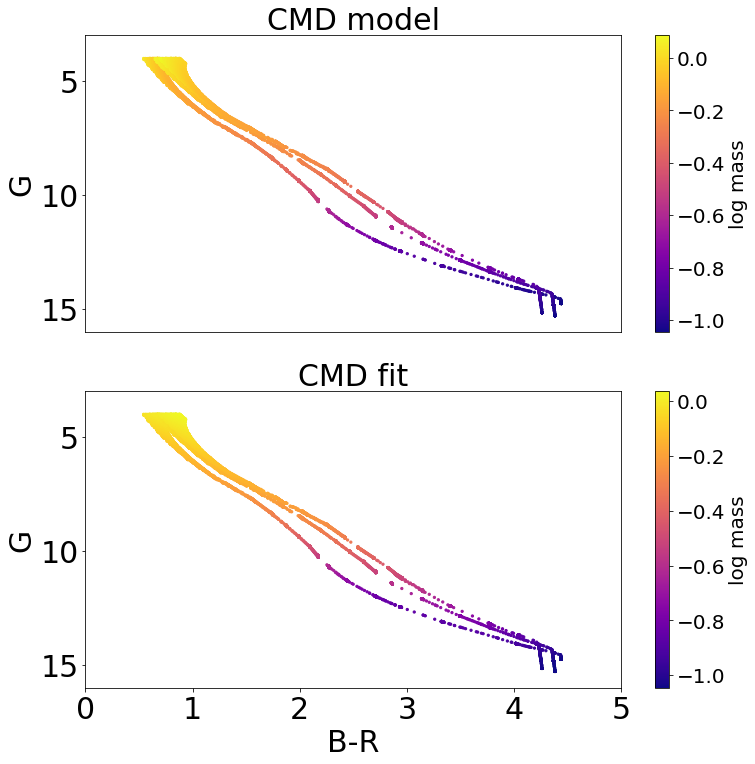

-0.0390611528562


In [100]:
from sklearn import linear_model

model_fits=fits.open('model.fits')
model=model_fits[1].data
mass_model=model['mass']
Gmag_model=model['Gmag']
Bp_model=model['G_BPmag']
Rp_model=model['G_RPmag']
index4=Gmag_model>4
mass_model4=mass_model[index4]
Gmag_model4=Gmag_model[index4]
Bp_model4=Bp_model[index4]
Rp_model4=Rp_model[index4]



bp_rp4=Bp_model4-Rp_model4

clf = linear_model.LinearRegression()

Y=[]
X=[]
for each in range(len(Gmag_model4)):
    X.append([Gmag_model4[each],bp_rp4[each],Gmag_model4[each]**2,Gmag_model4[each]**3,bp_rp4[each]**2,bp_rp4[each]**3])
    Y.append(mass_model4[each])
clf.fit(X,Y)
print(clf.coef_,clf.intercept_)
Y_predict=clf.predict(X)


plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title('CMD model',fontsize=font1)
plt.ylabel('G',fontsize=font1)
plt.scatter(bp_rp4,Gmag_model4,c=np.log10(mass_model4),cmap='plasma',s=5)
plt.tick_params(labelsize=font1)
plt.axis([0,5,16,3])
plt.colorbar()
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=font2)
cax.set_ylabel('log mass',fontsize=font2)
plt.xticks([])
plt.subplot(212)
plt.scatter(bp_rp4,Gmag_model4,c=np.log10(Y_predict),cmap='plasma',s=5)
plt.axis([0,5,16,3])
plt.title('CMD fit',fontsize=font1)
plt.xlabel('B-R',fontsize=font1)
plt.ylabel('G',fontsize=font1)
plt.tick_params(labelsize=font1)
plt.colorbar()
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=font2)
cax.set_ylabel('log mass',fontsize=font2)
plt.savefig('CMDfit_lowmass.png',format='png')
plt.show()

X_gaia1=[]
Gmag_gaia1=[]
distance_gaia1=[]
for each in range(len(Gmag_abs)):
    if Gmag_abs[each]>4:
        Gmag_gaia1.append(Gmag_abs[each])
        distance_gaia1.append(1000/plx[each])
        X_gaia1.append([Gmag_abs[each],bp_rp_gaia[each],Gmag_abs[each]**2,Gmag_abs[each]**3,bp_rp_gaia[each]**2,bp_rp_gaia[each]**3])
mass_gaia1=clf.predict(X_gaia1)

print(min(mass_gaia1))


[-0.48935339 -1.51945077  0.07402818 -0.00994888  3.01739098 -1.75971328] 2.59203180907


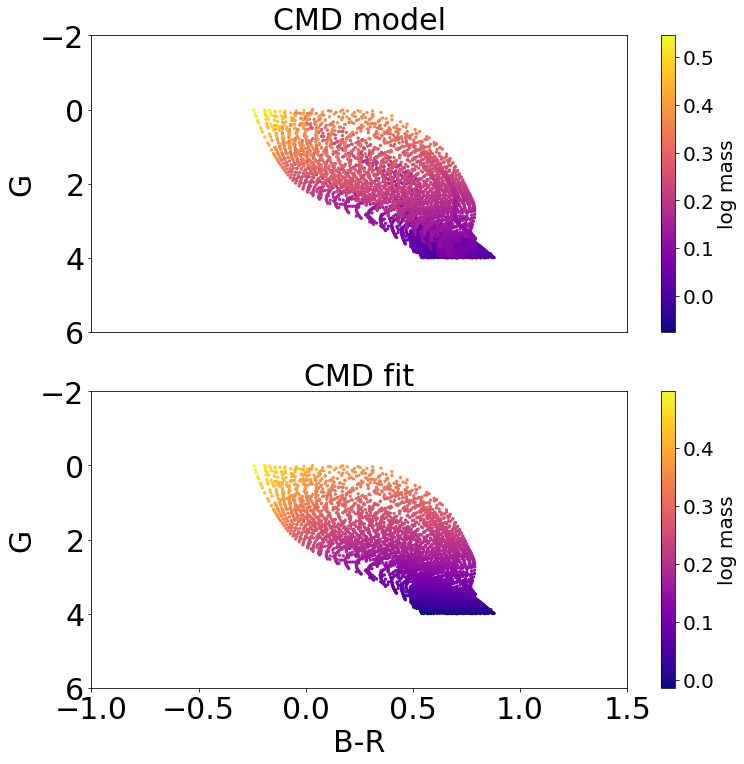

2.71063180339


In [101]:
index=(Gmag_model>0) & (Gmag_model<4)
mass_model=mass_model[index]
Gmag_model=Gmag_model[index]
Bp_model=Bp_model[index]
Rp_model=Rp_model[index]
bp_rp=Bp_model-Rp_model

clf = linear_model.LinearRegression()

Y=[]
X=[]
for each in range(len(Gmag_model)):
    X.append([Gmag_model[each],bp_rp[each],Gmag_model[each]**2,Gmag_model[each]**3,bp_rp[each]**2,bp_rp[each]**3])
    Y.append(mass_model[each])
clf.fit(X,Y)
Y_predict=clf.predict(X)
print(clf.coef_,clf.intercept_)

plt.figure(figsize=(12,12))
plt.subplot(211)
plt.scatter(bp_rp,Gmag_model,c=np.log10(mass_model),cmap='plasma',s=5)
plt.axis([-1,1.5,6,-2])
plt.title('CMD model',fontsize=font1)
plt.ylabel('G',fontsize=font1)
plt.tick_params(labelsize=font1)
plt.colorbar()
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=font2)
cax.set_ylabel('log mass',fontsize=font2)
plt.xticks([])
plt.subplot(212)
plt.scatter(bp_rp,Gmag_model,c=np.log10(Y_predict),cmap='plasma',s=5)
plt.axis([-1,1.5,6,-2])
plt.title('CMD fit',fontsize=font1)
plt.xlabel('B-R',fontsize=font1)
plt.ylabel('G',fontsize=font1)
plt.tick_params(labelsize=font1)
plt.colorbar()
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=font2)
cax.set_ylabel('log mass',fontsize=font2)
plt.savefig('CMDfit_highmass.png',format='png')
plt.show()

X_gaia2=[]
Gmag_gaia2=[]
distance_gaia2=[]
for each in range(len(Gmag_abs)):
    if Gmag_abs[each]<4:
        Gmag_gaia2.append(Gmag_abs[each])
        distance_gaia2.append(1000/plx[each])
        X_gaia2.append([Gmag_abs[each],bp_rp_gaia[each],Gmag_abs[each]**2,Gmag_abs[each]**3,bp_rp_gaia[each]**2,bp_rp_gaia[each]**3])
mass_gaia2=clf.predict(X_gaia2)

print(max(mass_gaia2))

In [98]:
mass_gaia=np.concatenate((mass_gaia1,mass_gaia2))
Gmag_gaia=np.concatenate((Gmag_gaia1,Gmag_gaia2))
distance_gaia=np.concatenate((distance_gaia1,distance_gaia2))
mass_list=np.logspace(-1.5,0.4,40)
density=np.zeros(len(mass_list)-1)
density_raw=np.zeros(len(mass_list)-1)
mass_point=[]
distance_maxlist=[]
for eachmass in range(len(mass_list)-1):
    mass_point.append((mass_list[eachmass]+mass_list[eachmass+1])/2)
    max_distance=0
    for each in range(len(mass_gaia)):
        if mass_list[eachmass]<mass_gaia[each]<mass_list[eachmass+1]:
            life=1.3*np.power(10,-0.4*(Gmag_gaia[each]-4.83))/mass_gaia[each]
            if life<1:
                life=1
            density[eachmass]=density[eachmass]+life
            density_raw[eachmass]=density_raw[eachmass]+1
            if distance_gaia[each]>max_distance:
                max_distance=distance_gaia[each]
    distance_maxlist.append(max_distance)
print(distance_maxlist)          



[99.651521559263955, 98.785623210088914, 99.718611358102777, 99.994344283986635, 99.856216718289474, 99.695521095846814, 99.839450309055806, 99.772967745691332, 99.998209239857147, 99.941918183366923, 99.98192126688555, 99.980443018939198, 99.999158619802913, 99.997619214107459, 99.998513214314968, 99.999148302221144, 99.999834631399281, 99.999097815850121, 99.998607210131894, 99.999634163314695, 99.999654207780665, 99.998974971202472, 99.998453633336254, 99.998717148671119, 99.999920119891257, 99.999649509559148, 99.998747885612261, 99.999926248371921, 99.998957935584343, 99.999852919581187, 99.999075739754019, 99.998512568576402, 99.997136893718505, 99.997772622002628, 99.997285211614823, 99.995750539921815, 99.959756081363281, 99.960468661964441, 99.843167069997378]


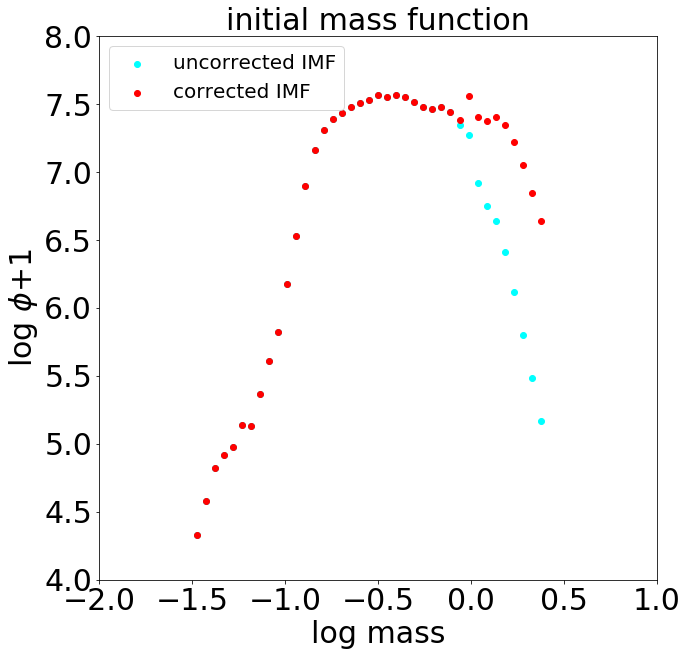

In [97]:

plt.figure(figsize=(10,10))
plt.scatter(np.log10(mass_point),np.log10(density_raw/(4/3*np.pi*100**3))+10,color='cyan',label='uncorrected IMF')
plt.scatter(np.log10(mass_point),np.log10(density/(4/3*np.pi*100**3))+10,color='red',label='corrected IMF')
plt.title('initial mass function',fontsize=font1)
plt.xlabel('log mass',fontsize=font1)
plt.ylabel(r'log $\phi$+1',fontsize=font1)
plt.tick_params(labelsize=font1)
plt.legend(fontsize=font2)
plt.axis([-2,1,4,8])
plt.savefig('IMF.png',format='png')
plt.show()